In [1]:
#Importing Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import sklearn
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


In [5]:
#Loading the dataset
df = pd.read_csv('tips.csv')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [7]:
#Copying the DataFrame into some other variable
df2 = df.copy()
df2.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### 1. Make a list of categorical and numerical columns in the data.

In [169]:
numericalCols = []
categoricalCols = []

for i in df2.columns:
    if df2[i].dtypes == 'object':
        numericalCols.append(i)
    else:
        categoricalCols.append(i)

print('Numerical Columns are:\n',numericalCols)
print('Categorical Columns are:\n',categoricalCols)
    

Numerical Columns are:
 ['sex', 'smoker', 'day', 'time']
Categorical Columns are:
 ['total_bill', 'tip', 'size']


### 2. Compute the average bill amount for each day.

In [197]:
df2.groupby('day')['total_bill'].mean()

day
Fri     17.151579
Sat     20.441379
Sun     21.410000
Thur    17.682742
Name: total_bill, dtype: float64

### 3. Which gender is more generous in giving tips?

In [219]:
df2.groupby('sex')['tip'].mean()

sex
Female    2.833448
Male      3.089618
Name: tip, dtype: float64

### 4. According to the data, were there more customers for dinner or lunch?

In [233]:
df2.groupby('time')['time'].size()

time
Dinner    176
Lunch      68
Name: time, dtype: int64

### 5. Based on the statistical summary, comment on the variable 'tip'

In [243]:
df2['tip'].describe()

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

### 6. Find the busiest day in terms of the orders?

In [288]:
df2.day.mode()

0    Sat
Name: day, dtype: object

### 7. Is the variable 'total_bill' skewed? If yes, identify the type of skewness. Support your answer with a plot

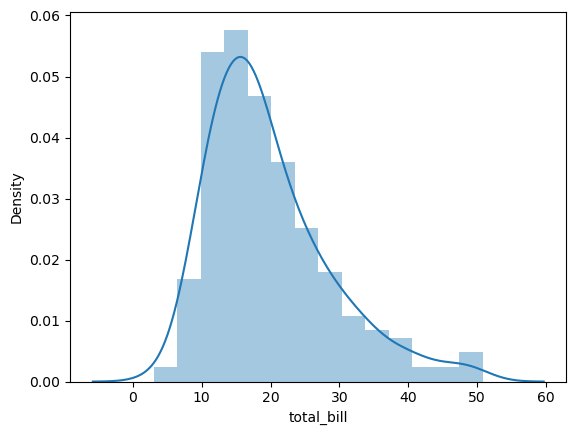

In [527]:
sns.distplot(df2['total_bill'])
plt.show()

In [529]:
df2['total_bill'].skew()

1.1332130376158205

### 8. Is the tip amount dependent on the total bill? Visualize the relationship with a appropriate plot and metric and write your findings.

In [535]:
df2[['tip','total_bill']].corr()

,tip,total_bill
tip,1.000000,0.675734
total_bill,0.675734,1.000000


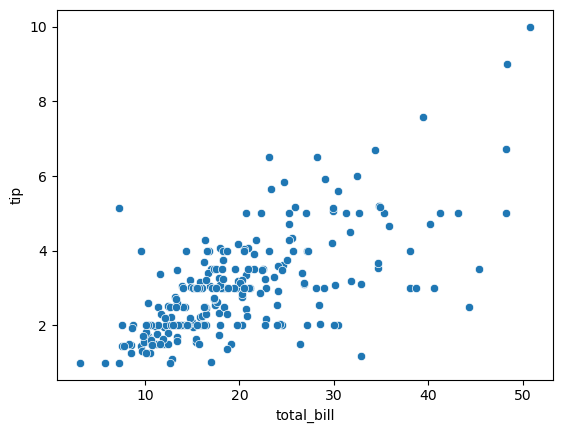

In [540]:
sns.scatterplot(data = df2, x ='total_bill', y = 'tip')
plt.show()

### 9. What is the percentage of males and females in the dataset? and display it in the plot

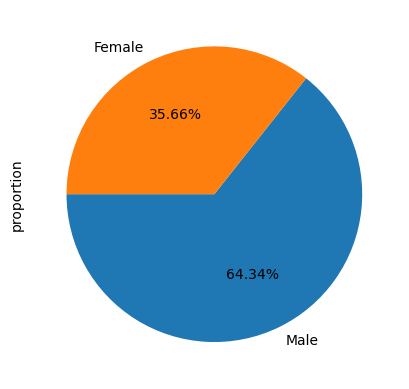

In [709]:
df2['sex'].value_counts(normalize=True).plot(kind='pie',autopct='%.2f%%',startangle=180)
plt.show()

### 10. Compute the gender-wise count based on smoking habits and display it in the plot

In [707]:
df2.groupby('sex')['smoker'].value_counts()

sex     smoker
Female  No        54
        Yes       33
Male    No        97
        Yes       60
Name: count, dtype: int64

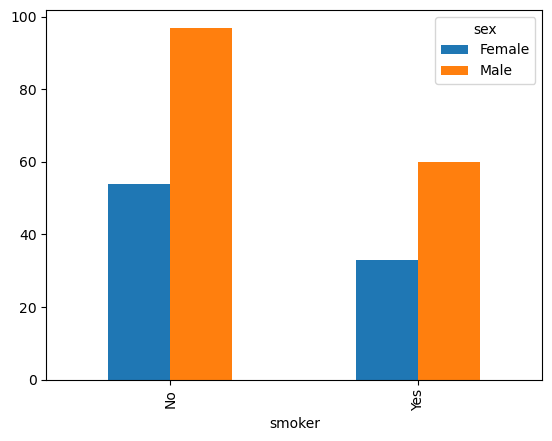

In [637]:
pd.crosstab(df2['smoker'],df2['sex']).plot(kind='bar')
plt.show()

### 11. Compute the average tip amount given for different days and display it in the plot.

In [715]:
df2.groupby('day')['tip'].mean()

day
Fri     2.734737
Sat     2.993103
Sun     3.255132
Thur    2.771452
Name: tip, dtype: float64

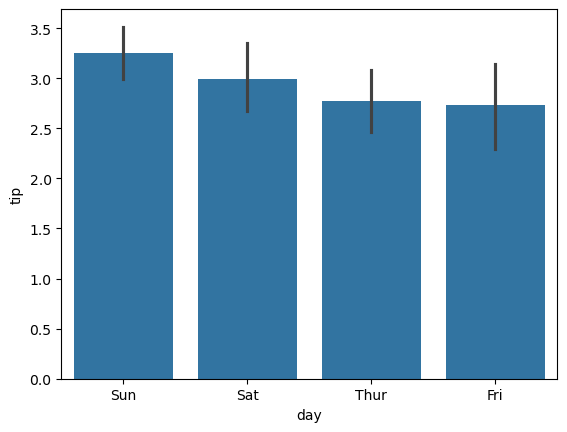

In [686]:
sns.barplot(x='day',y='tip', data=df2)
plt.show()

### 12. Is the average bill amount dependent on the size of the group? Visualize the relationship using appropriate plot and write your findings.

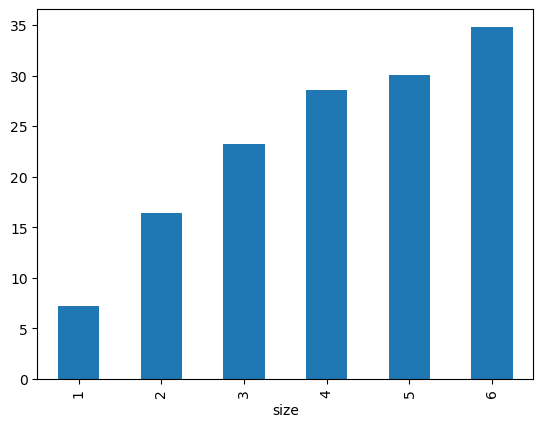

In [699]:
df2.groupby('size')['total_bill'].mean().plot(kind='bar')
plt.show()

### 13. Plot a horizontal boxplot to compare the bill amount based on gender

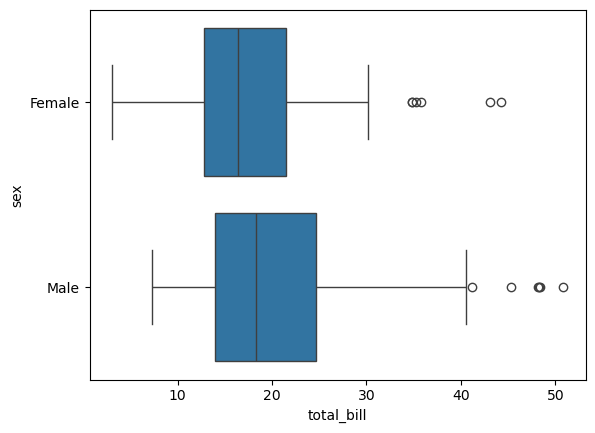

In [143]:
sns.boxplot(x='total_bill',y ='sex', data = df2)
plt.show()

### 14. Find the maximum bill amount for lunch and dinner on Saturday and Sunday

In [250]:
df2.groupby(['time','day'])['total_bill'].max()

time    day 
Dinner  Fri     40.17
        Sat     50.81
        Sun     48.17
        Thur    18.78
Lunch   Fri     16.27
        Thur    43.11
Name: total_bill, dtype: float64

### 15. Compute the percentage of missing values in the dataset.

In [282]:
df2.isnull().sum() / df2.count() * 100

total_bill    0.0
tip           0.0
sex           0.0
smoker        0.0
day           0.0
time          0.0
size          0.0
dtype: float64

### 16. Is there are any duplicate records in the dataset? If yes compute the count of the duplicate records and drop them.

In [322]:
len(df2[df2.duplicated()])

1

In [36]:
df2.drop_duplicates(inplace=True)
print(df2)

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[243 rows x 7 columns]


In [42]:
len(df2[df2.duplicated()])

0

### 17. Is there are any outliers present in the column 'total_bill'? If yes treat them with transformation approach, and plot a boxplot before and after the treatment

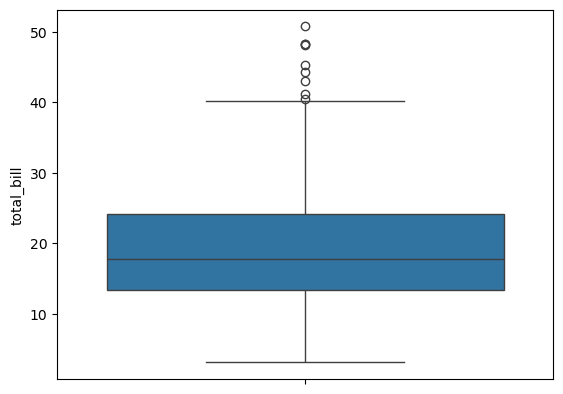

In [68]:
sns.boxplot(df2['total_bill'])
plt.show()

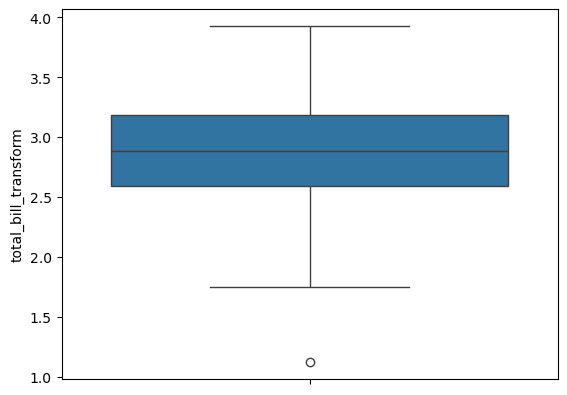

In [70]:
#Outliers Treatment using Log Transformation
df2['total_bill_transform'] = np.log(df2['total_bill'])

#box plot after log transformation
sns.boxplot(df2['total_bill_transform'])
plt.show()

### 18. Is there are any outliers present in the column 'tip'? If yes remove them using IQR techinque.

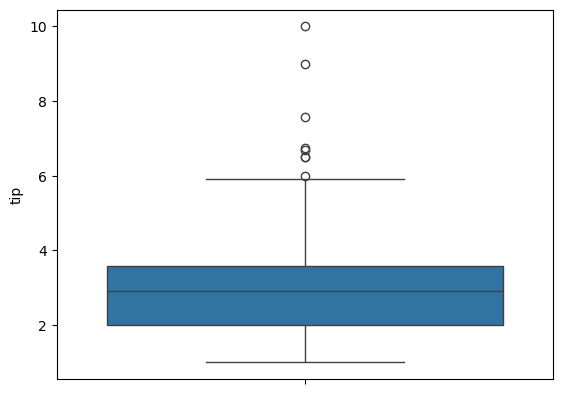

In [74]:
sns.boxplot(df2['tip'])
plt.show()

In [90]:
#Applying IQR Method
Q1 = df2['tip'].quantile(0.25)
Q3 = df2['tip'].quantile(0.75)

IQR = Q3 - Q1

lower_whisker = Q1 - (1.5 * IQR)
upper_whisker = Q3 + (1.5 * IQR)

df_With_IQR = df2.loc[(df2['tip'] < upper_whisker) & (df2['tip'] > lower_whisker)]

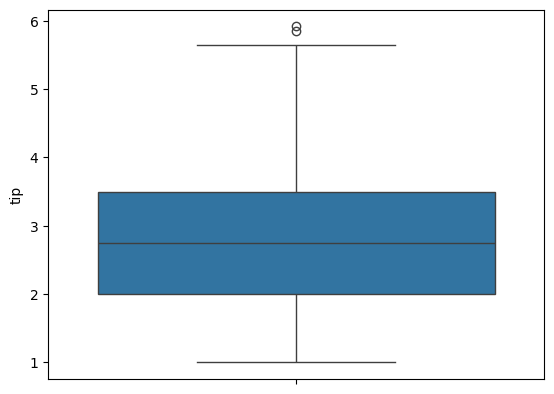

In [94]:
#box plot after IQR Treatment
sns.boxplot(df_With_IQR['tip'])
plt.show()

### 19. Encode the categorical columns in the dataset and print the random 5 samples from the dataframe.

In [99]:
df2 = pd.get_dummies(df2, drop_first=True)
df2.sample(5)

,total_bill,tip,size,total_bill_transform,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
98,21.01,3.00,2,3.044999,True,True,False,False,False,False
127,14.52,2.00,2,2.675527,False,False,False,False,True,True
102,44.30,2.50,3,3.790985,False,True,True,False,False,False
172,7.25,5.15,2,1.981001,True,True,False,True,False,False
35,24.06,3.60,3,3.180551,True,False,True,False,False,False


### 20. Check the range of the column 'total_bill' and transform the values such that the range will be 1.

In [101]:
tb_max = df['total_bill'].max()
tb_min = df['total_bill'].min()
range_= tb_max - tb_min
print(range_)

47.74


In [111]:
mms = MinMaxScaler()

In [115]:
df2['total_bill_mm'] = mms.fit_transform(df2[['total_bill']])

In [121]:
#Normalizing the values of the total_bill so to values will be 1
tb_mm_max = df2['total_bill_mm'].max()
tb_mm_min = df2['total_bill_mm'].min()
range_ = tb_mm_max - tb_mm_min
print( range_ )

0.9999999999999999


### 21. Load the dataset again by giving the name of the dataframe as "tips_df"
### i) Encode the categorical variables.
### ii) Store the target column (i.e.tip) in the y variable and the rest of the columns in the X variable

In [131]:
tips_df =  pd.read_csv('tips.csv')
df2.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [135]:
#Encoding Categorical Variables
tips_df = pd.get_dummies(tips_df,drop_first= True)
tips_df.head(2)

,total_bill,tip,size,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
0,16.99,1.01,2,False,False,False,True,False,False
1,10.34,1.66,3,True,False,False,True,False,False


In [137]:
#Storing the target column in y variable and rest in x
X = tips_df.drop('tip',axis=1)
y = tips_df['tip']

### 22. Split the dataset into two parts (i.e. 70% train and 30% test), and Standardize the columns "total_bill" and "Size" using the mim_max scaling approach

In [141]:
#Split the Data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

#Scaling the Data using Min Max Scaler

mms = MinMaxScaler()

X_train.iloc[:,:2] = mms.fit_transform(X_train.iloc[:,:2])
X_test.iloc[:,:2] = mms.fit_transform(X_test.iloc[:,:2])


(170, 8) (74, 8)
(170,) (74,)


### 23. Train a linear regression model using the training data and print the r_squared value of the prediction on the test data.

In [145]:
#Linear Regression model on train data
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [147]:
#making predictions on the test data
pred = lr.predict(X_test)

In [149]:
#Computing R-2 Score
print('r2-Score_test',r2_score(y_test,pred))

r2-Score_test 0.3994816144627614
